# Simple example

Here we run a simple linear regression model (even without intercept) 
and make a selection when the $Z$ score is larger than 2.

The functions `partial_model_inference` and `pivot_plot` below are just simulation utilities
used to simulate results in least squares regression. The underlying functionality
is contained in the function `selectinf.learning.core.infer_general_target`.


In [ ]:
import functools

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from selectinf.tests.instance import gaussian_instance

from selectinf.learning.utils import partial_model_inference, pivot_plot
from selectinf.learning.core import normal_sampler
from selectinf.learning.Rfitters import logit_fit

In [1]:
np.random.seed(0) # for replicability
def simulate(n=20, p=1, s=1, signal=1, sigma=2, alpha=0.1, B=2000):

    # description of statistical problem

    X, y, truth = gaussian_instance(n=n,
                                    p=p, 
                                    s=s,
                                    equicorrelated=False,
                                    rho=0.5, 
                                    sigma=sigma,
                                    signal=signal,
                                    random_signs=True,
                                    scale=False)[:3]

    dispersion = sigma**2

    S = X.T.dot(y)
    covS = dispersion * X.T.dot(X)
    sampler = normal_sampler(S, covS)

    def base_algorithm(X, dispersion, sampler):

        success = np.zeros(p)

        scale = 0.
        noisy_S = sampler(scale=scale)
        
        Z = noisy_S / np.sqrt(np.linalg.norm(X)**2 * dispersion)
        if Z > 2:
            return set([0])
        else:
            return set([])

    selection_algorithm = functools.partial(base_algorithm, X, dispersion)

    # run selection algorithm

    return partial_model_inference(X,
                                   y,
                                   truth,
                                   selection_algorithm,
                                   sampler,
                                   B=B,
                                   fit_probability=logit_fit,
                                   fit_args={'df':20})

/Users/jonathantaylor/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
/Users/jonathantaylor/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jonathantaylor/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jonathantaylor/anacon

In [2]:
dfs = []
for i in range(1000):
    df = simulate()
    if df is not None:
        dfs.append(df)

/Users/jonathantaylor/git-repos/selectinf/selectinf/distributions/discrete_family.py:86: RuntimeWarning: divide by zero encountered in log
  self._lw = np.array([np.log(v) for v in xw[:,1]])


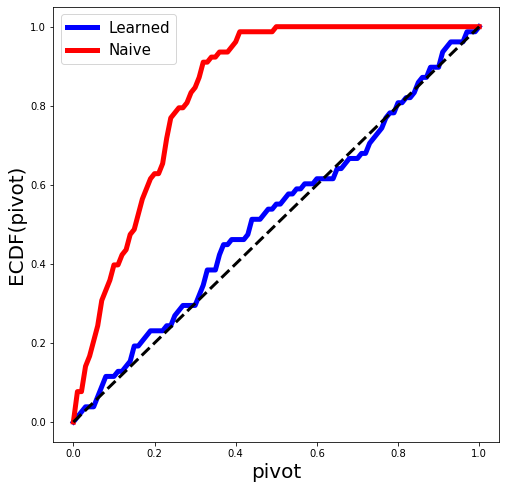

In [3]:
fig = plt.figure(figsize=(8, 8))
results = pd.concat(dfs)
pivot_plot(results, fig=fig);